In [3]:
import pandas as pd

# Read CSV with proper encoding
df = pd.read_csv(
    "Superstore_Sales_Dataset.csv",
    encoding="ISO-8859-1",            # 👈 Fixes UnicodeDecodeError
    parse_dates=["Order Date", "Ship Date"]
)

# Clean the data
df.dropna(subset=["Sales", "Profit"], inplace=True)
df["Sales"] = pd.to_numeric(df["Sales"], errors="coerce")
df["Profit"] = pd.to_numeric(df["Profit"], errors="coerce")

# Add calculated column
df["Profit Margin"] = (df["Profit"] / df["Sales"]) * 100

# Save cleaned file
df.to_csv("Superstore_Sales_Dataset_Cleaned.csv", index=False)
print("✅ Cleaned file saved successfully.")


✅ Cleaned file saved successfully.


In [4]:
print("Total Revenue:", df["Sales"].sum())
print("Total Profit:", df["Profit"].sum())
print("Top 5 Products by Sales:")
print(df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head())


Total Revenue: 2297200.8603
Total Profit: 286397.0217
Top 5 Products by Sales:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


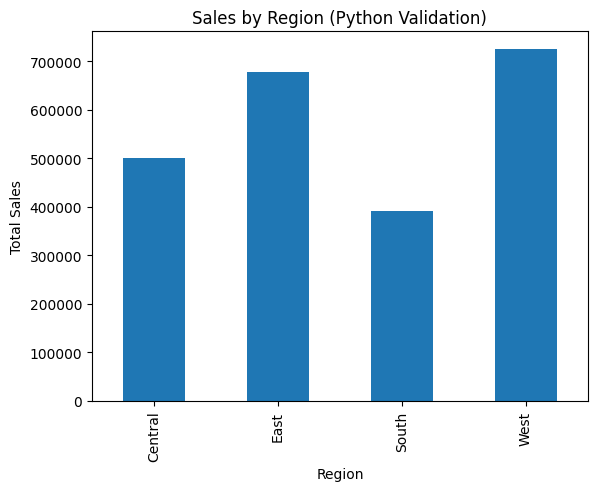

In [5]:
import matplotlib.pyplot as plt

region_sales = df.groupby("Region")["Sales"].sum()
region_sales.plot(kind='bar')
plt.title("Sales by Region (Python Validation)")
plt.ylabel("Total Sales")
plt.show()
